### Task variant 20
* Classes count: $N = 4$
* Elements in class: $M = 536$
* Error min. $R1 = 0.49$ max. $R2 = 0.51$

In [21]:
N = 4
M = 536
R1 = 0.49
R2 = 0.51

DATA_FRAGMENTATION = 0.5
CLOUD_SHIFT = 0.556

GRAPH_POINT_SIZE = 30
GRAPH_POINT_ALPHA = 0.3

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

#### Generating 2d Gaussian noise, $M$ points by 2 coordinates

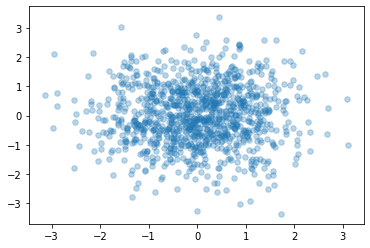

In [23]:
noise = np.random.randn(M * 2, 2) 
plt.scatter(noise[:,0], noise[:,1], s=GRAPH_POINT_SIZE, alpha=GRAPH_POINT_ALPHA)

#### Shifting noise a bit to create clouds

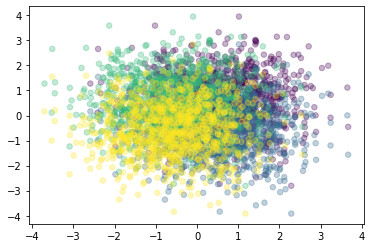

In [24]:
XY = np.vstack([
    noise + np.array([CLOUD_SHIFT, CLOUD_SHIFT]), 
    noise + np.array([CLOUD_SHIFT, -CLOUD_SHIFT]), 
    noise + np.array([-CLOUD_SHIFT, CLOUD_SHIFT]), 
    noise + np.array([-CLOUD_SHIFT, -CLOUD_SHIFT])
])

annotations = [0] * M * 2 + [1] * M * 2 + [2] * M * 2 + [3] * M * 2

plt.scatter(XY[:,0], XY[:,1], c=annotations, s=GRAPH_POINT_SIZE, alpha=GRAPH_POINT_ALPHA)

In [25]:
for i in range(N):
    print(f"Cloud {i}:")
    print(f"Mean: {XY[i].mean()} \n Std: {XY[i].std()}\n Mean axis=0: {XY[i].mean(axis=0)}\n")

Cloud 0:
Mean: 1.077038909717096 
 Std: 0.6321781725862881
 Mean axis=0: 1.077038909717096

Cloud 1:
Mean: -0.43293423557820454 
 Std: 1.5753906312917985
 Mean axis=0: -0.43293423557820454

Cloud 2:
Mean: 0.008204943290102518 
 Std: 0.6667415325041504
 Mean axis=0: 0.008204943290102518

Cloud 3:
Mean: 0.8876436855374865 
 Std: 0.26609894513226856
 Mean axis=0: 0.8876436855374865



#### Shuffling data, generating training and testing sets 

In [26]:
data, labels = shuffle(XY, annotations)

test_size = int(len(data) * DATA_FRAGMENTATION)
Xtrain = data[:test_size]
Ytrain = labels[:test_size]
Xtest = data[test_size:]
Ytest = labels[test_size:]

#### Creating and fitting the model

In [27]:
clf = LogisticRegression(solver='lbfgs', multi_class='auto')
clf.fit(Xtrain, Ytrain);

#### Testing the model

In [28]:
predictions = clf.predict(Xtest)
confusion_matrix(Ytest, predictions)

array([[267, 105,  83,  46],
       [118, 282,  36,  92],
       [141,  50, 267, 123],
       [ 61, 118,  96, 259]])

In [29]:
score = accuracy_score(Ytest, predictions)
is_fitting = R1 <= score and score <= R2

print(f"Score: {score} \n Fitting in accuracy range: {is_fitting}")

Score: 0.5013992537313433 
 Fitting in accuracy range: True


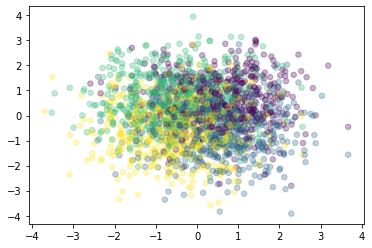

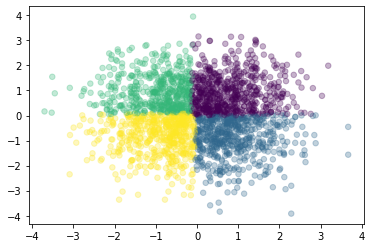

In [30]:
plt.scatter(Xtest[:,0], Xtest[:,1], c=Ytest, s=GRAPH_POINT_SIZE, alpha=GRAPH_POINT_ALPHA)
plt.show()
plt.scatter(Xtest[:,0], Xtest[:,1], c=predictions, s=GRAPH_POINT_SIZE, alpha=GRAPH_POINT_ALPHA)
plt.show()